# **ML Analysis and Proccessing of the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data

fredData = pd.read_csv('FRED_Data.csv')
fredData

,Date,High Yield Spread,WTI Oil Price,10-Yr Yield
0,2000-09-18,6.35,36.75,5.88
1,2000-09-19,6.41,36.96,5.86
2,2000-09-20,6.43,37.22,5.91
3,2000-09-21,6.45,33.84,5.88
4,2000-09-22,6.50,32.66,5.85
...,...,...,...,...
6332,2024-12-25,NaN,NaN,NaN
6333,2024-12-26,2.86,70.38,4.58
6334,2024-12-27,2.84,71.28,4.62
6335,2024-12-30,2.94,71.73,4.55


In [3]:
# Read the data

nasdaqData = pd.read_csv('dataNQ.csv')
nasdaqData

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close,Daily ROC
0,2000-09-18,3653.50,78.568900,38.636200,3680.333333,20.250000,116.010002,0.006500
1,2000-09-19,3804.00,78.585400,46.782900,3759.000000,19.540001,116.129997,0.041193
2,2000-09-20,3853.00,78.584300,49.899100,3814.166667,19.930000,116.290001,0.012881
3,2000-09-21,3765.00,78.517400,38.345800,3794.333333,20.180000,115.000000,-0.022839
4,2000-09-22,3776.00,78.541200,48.106700,3723.666667,20.740000,113.339996,0.002922
...,...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000,-0.006527
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996,0.006674
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999,0.014429
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002,-0.004319


# Merge the data

In [4]:
# Merge the data

nasdaqData['Date'] = pd.to_datetime(nasdaqData['Date'])
fredData['Date'] = pd.to_datetime(fredData['Date'])

nasdaqData = nasdaqData.drop_duplicates(subset='Date')
fredData = fredData.drop_duplicates(subset='Date')

data_full = pd.merge(nasdaqData, fredData, on = 'Date', how = 'inner')
data_full

,Date,Close,SMA100,RSI,VWAP,VIX Close,DXY Close,Daily ROC,High Yield Spread,WTI Oil Price,10-Yr Yield
0,2000-09-18,3653.50,78.568900,38.636200,3680.333333,20.250000,116.010002,0.006500,6.35,36.75,5.88
1,2000-09-19,3804.00,78.585400,46.782900,3759.000000,19.540001,116.129997,0.041193,6.41,36.96,5.86
2,2000-09-20,3853.00,78.584300,49.899100,3814.166667,19.930000,116.290001,0.012881,6.43,37.22,5.91
3,2000-09-21,3765.00,78.517400,38.345800,3794.333333,20.180000,115.000000,-0.022839,6.45,33.84,5.88
4,2000-09-22,3776.00,78.541200,48.106700,3723.666667,20.740000,113.339996,0.002922,6.50,32.66,5.85
...,...,...,...,...,...,...,...,...,...,...,...
6092,2024-12-12,21651.25,20048.355098,69.595803,21676.000000,13.920000,106.959000,-0.006527,2.66,70.25,4.32
6093,2024-12-13,21795.75,20074.280098,71.296713,21790.083333,13.810000,106.992996,0.006674,2.68,71.54,4.40
6094,2024-12-16,22110.25,20105.460098,74.550898,22008.250000,14.690000,107.029999,0.014429,2.69,71.03,4.39
6095,2024-12-17,22014.75,20133.862598,70.529701,22027.166667,15.870000,106.663002,-0.004319,2.75,70.31,4.40


In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6097 entries, 0 to 6096
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               6097 non-null   datetime64[ns]
 1   Close              6097 non-null   float64       
 2   SMA100             6097 non-null   float64       
 3   RSI                6097 non-null   float64       
 4   VWAP               6093 non-null   float64       
 5   VIX Close          6097 non-null   float64       
 6   DXY Close          6097 non-null   float64       
 7   Daily ROC          6097 non-null   float64       
 8   High Yield Spread  6095 non-null   float64       
 9   WTI Oil Price      6073 non-null   float64       
 10  10-Yr Yield        6053 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 524.1 KB


In [6]:
# Drop the Date column

data_full = data_full.drop('Date', axis = 1)

# **Build the Pipeline**

# Cleaner

In [7]:
# Import the corresponding libraries and modules

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [8]:
# Divide the data into features and target

X = data_full.drop(columns = 'Daily ROC')
y = data_full['Daily ROC']

In [9]:
# Create a class for cleaning the data

class Cleaner(BaseEstimator, TransformerMixin):

    def __init__(self, columns_to_impute = None, n_neighbors = 5):
        self.columns_to_impute = columns_to_impute
        self.n_neighbors = n_neighbors
        self.imputer = None

    def fit(self, X, y = None):

        if self.columns_to_impute:
            self.imputer = KNNImputer(n_neighbors = self.n_neighbors)
            self.imputer.fit(X[self.columns_to_impute])
        return self

    def transform(self, X):

        X_cleaned = X.copy()
        
        # Impute the missing values

        if self.columns_to_impute and self.imputer:
            X_cleaned[self.columns_to_impute] = self.imputer.transform(X_cleaned[self.columns_to_impute])

        # Round 2 decimal places

        X_cleaned = X_cleaned.round(2)

        return X_cleaned

# Set the Pipeline (Cleaner, Standardization)

In [10]:
pipeline = Pipeline(steps=[
    ('cleaner', Cleaner(columns_to_impute=['VWAP', 'High Yield Spread', 'WTI Oil Price', '10-Yr Yield'])),
    ('scaler', StandardScaler())
])

In [11]:
# Fit the pipeline

X_pre = pipeline.fit_transform(X)

In [12]:
# Save the Standard Scaler and PCA objects

import pickle 

# Extract them 

scaler = pipeline.named_steps['scaler']


# Save them

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [33]:
# Convert the cleaned data to a DataFrame

X_pre = pd.DataFrame(X_pre, columns = X.columns)
X_pre


,Close,SMA100,RSI,VWAP,VIX Close,DXY Close,High Yield Spread,WTI Oil Price,10-Yr Yield
0,-0.325915,-1.033018,-0.973876,-0.320324,0.052575,2.139112,0.340392,-1.112677,2.200412
1,-0.296013,-1.033014,-0.490536,-0.304684,-0.030352,2.149850,0.363038,-1.104314,2.184021
2,-0.286277,-1.033016,-0.305276,-0.293717,0.015200,2.164167,0.370587,-1.093960,2.224998
3,-0.303762,-1.033029,-0.991095,-0.297661,0.044399,2.048736,0.378135,-1.228561,2.200412
4,-0.301576,-1.033025,-0.411563,-0.311708,0.109806,1.900196,0.397007,-1.275551,2.175825
...,...,...,...,...,...,...,...,...,...
6092,3.250034,3.073584,0.864477,3.257170,-0.686760,1.329303,-1.052327,0.221382,0.921907
6093,3.278744,3.078914,0.965420,3.279849,-0.699608,1.331987,-1.044779,0.272754,0.987471
6094,3.341232,3.085326,1.158400,3.323221,-0.596825,1.335567,-1.041004,0.252444,0.979276
6095,3.322257,3.091166,0.919699,3.326982,-0.459003,1.302458,-1.018358,0.223772,0.987471


In [34]:
# Turn the data into a dataframe

y = pd.DataFrame(y, columns = ['Daily ROC'])
y

,Daily ROC
0,0.006500
1,0.041193
2,0.012881
3,-0.022839
4,0.002922
...,...
6092,-0.006527
6093,0.006674
6094,0.014429
6095,-0.004319


In [35]:
# Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size = 0.3, random_state = 42)   

In [36]:
from sklearn.metrics import *

In [37]:
# Dataframe to hold the results

metrics = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'R2'], columns = ['Train', 'Test'])

# **M1: Random Forest - Regression**

In [38]:
# Random Search

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_forest = RandomForestRegressor()

random_search = RandomizedSearchCV(estimator = random_forest,
                                   param_distributions = param_grid,
                                   n_iter = 100,
                                   cv = 6,
                                   verbose = 2,
                                   random_state = 42,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)

# Best parameters

best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Best estimator    

best_estimator = random_search.best_estimator_
print("Best estimator: ", best_estimator)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5}
Best estimator:  RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)


In [39]:

# Predictions on the train and test sets

y_train_pred = best_estimator.predict(X_train)
y_test_pred = best_estimator.predict(X_test)

# Calculate the metrics

metrics.loc['MSE', 'Train'] = mean_squared_error(y_train, y_train_pred)
metrics.loc['MSE', 'Test'] = mean_squared_error(y_test, y_test_pred)
metrics.loc['RMSE', 'Train'] = np.sqrt(metrics.loc['MSE', 'Train'])
metrics.loc['RMSE', 'Test'] = np.sqrt(metrics.loc['MSE', 'Test'])
metrics.loc['MAE', 'Train'] = mean_absolute_error(y_train, y_train_pred)
metrics.loc['MAE', 'Test'] = mean_absolute_error(y_test, y_test_pred)
metrics.loc['R2', 'Train'] = r2_score(y_train, y_train_pred)
metrics.loc['R2', 'Test'] = r2_score(y_test, y_test_pred)

# Display the metrics

print(metrics.round(3))

         Train      Test
MSE   0.000212  0.000252
RMSE  0.014561  0.015862
MAE   0.009994  0.010506
R2    0.196864  0.081622


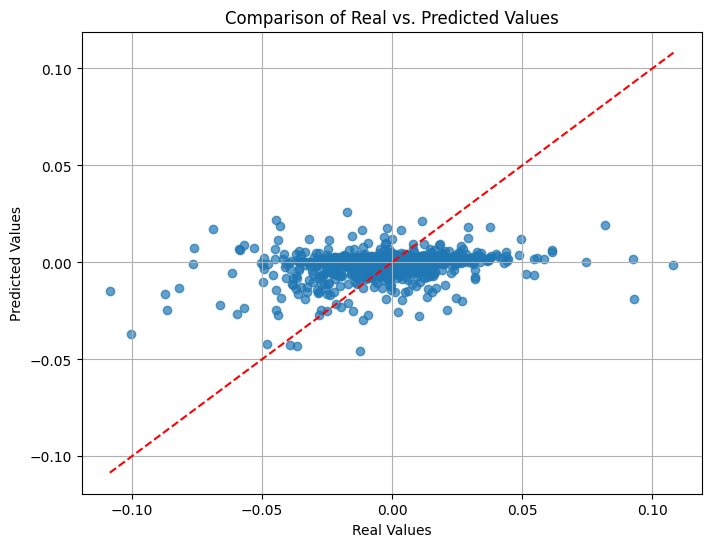

In [40]:
# Plot the results

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_test_pred, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real vs. Predicted Values')
plt.grid(True)
plt.show()

# **M2: SVM - Regression**

In [42]:
# SVM

from sklearn.svm import SVR

param_grid_svm = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm_model = SVR()

random_search_svm = RandomizedSearchCV(estimator = svm_model,
                                       param_distributions = param_grid_svm,
                                       n_iter = 100,
                                       cv = 6,
                                       verbose = 2,
                                       random_state = 42,
                                       n_jobs = -1)

random_search_svm.fit(X_train, y_train)

# Best parameters for SVM

best_params_svm = random_search_svm.best_params_
print("Best parameters for SVM found: ", best_params_svm)


# Best estimator for SVM

best_estimator_svm = random_search_svm.best_estimator_
print("Best estimator for SVM: ", best_estimator_svm)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 6 folds for each of 32 candidates, totalling 192 fits
Best parameters for SVM found:  {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
Best estimator for SVM:  SVR(C=1, gamma='auto')


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
# Predictions on the train and test sets

y_train_pred_svm = best_estimator_svm.predict(X_train)
y_test_pred_svm = best_estimator_svm.predict(X_test)

# Calculate the metrics for SVM

metrics_svm = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'R2'], columns = ['Train', 'Test'])
metrics_svm.loc['MSE', 'Train'] = mean_squared_error(y_train, y_train_pred_svm)
metrics_svm.loc['MSE', 'Test'] = mean_squared_error(y_test, y_test_pred_svm)
metrics_svm.loc['RMSE', 'Train'] = np.sqrt(metrics_svm.loc['MSE', 'Train'])
metrics_svm.loc['RMSE', 'Test'] = np.sqrt(metrics_svm.loc['MSE', 'Test'])
metrics_svm.loc['MAE', 'Train'] = mean_absolute_error(y_train, y_train_pred_svm)
metrics_svm.loc['MAE', 'Test'] = mean_absolute_error(y_test, y_test_pred_svm)
metrics_svm.loc['R2', 'Train'] = r2_score(y_train, y_train_pred_svm)
metrics_svm.loc['R2', 'Test'] = r2_score(y_test, y_test_pred_svm)

# Display the SVM metrics

print(metrics_svm.round(3))

         Train      Test
MSE   0.000427  0.000472
RMSE  0.020664  0.021719
MAE   0.014501  0.014659
R2   -0.617315 -0.721886


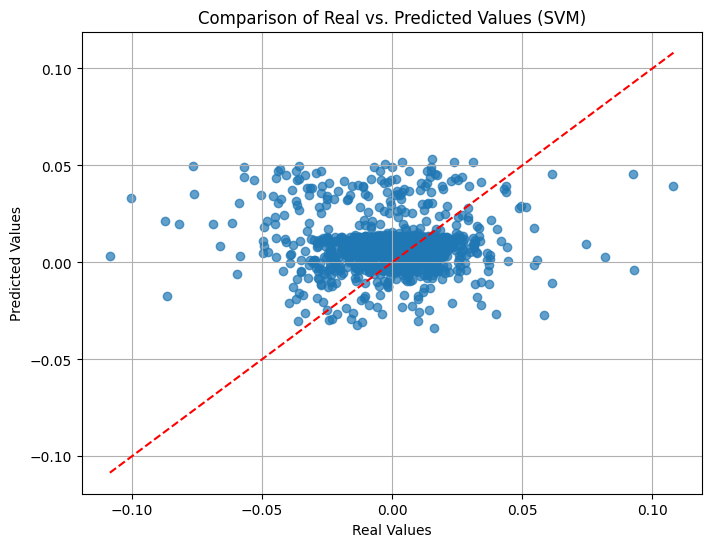

In [44]:
# Plot the results

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_test_pred_svm, alpha = 0.7)   
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real vs. Predicted Values (SVM)')
plt.grid(True)
plt.show()

# **M3: MLP - Regression**

In [45]:
# Multilayer Perceptron (MLP)

from sklearn.neural_network import MLPRegressor

param_grid_mlp = {
    'hidden_layer_sizes': [(5,5), (10,), (10, 10), (15, 20)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

mlp_model = MLPRegressor()

random_search_mlp = RandomizedSearchCV(estimator = mlp_model,
                                       param_distributions = param_grid_mlp,
                                       n_iter = 100,
                                       cv = 6,
                                       verbose = 2,
                                       random_state = 42,
                                       n_jobs = -1)

random_search_mlp.fit(X_train, y_train)

# Best parameters for MLP

best_params_mlp = random_search_mlp.best_params_
print("Best parameters for MLP found: ", best_params_mlp)

# Best estimator for MLP

best_estimator_mlp = random_search_mlp.best_estimator_
print("Best estimator for MLP: ", best_estimator_mlp)

Fitting 6 folds for each of 100 candidates, totalling 600 fits
Best parameters for MLP found:  {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (15, 20), 'alpha': 0.0001, 'activation': 'identity'}
Best estimator for MLP:  MLPRegressor(activation='identity', hidden_layer_sizes=(15, 20),
             learning_rate='invscaling', solver='lbfgs')


c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
# Predictions on the train and test sets

y_train_pred_mlp = best_estimator_mlp.predict(X_train)
y_test_pred_mlp = best_estimator_mlp.predict(X_test)

# Calculate the metrics for MLP

metrics_mlp = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'R2'], columns = ['Train', 'Test'])
metrics_mlp.loc['MSE', 'Train'] = mean_squared_error(y_train, y_train_pred_mlp)
metrics_mlp.loc['MSE', 'Test'] = mean_squared_error(y_test, y_test_pred_mlp)
metrics_mlp.loc['RMSE', 'Train'] = np.sqrt(metrics_mlp.loc['MSE', 'Train'])
metrics_mlp.loc['RMSE', 'Test'] = np.sqrt(metrics_mlp.loc['MSE', 'Test'])
metrics_mlp.loc['MAE', 'Train'] = mean_absolute_error(y_train, y_train_pred_mlp)
metrics_mlp.loc['MAE', 'Test'] = mean_absolute_error(y_test, y_test_pred_mlp)
metrics_mlp.loc['R2', 'Train'] = r2_score(y_train, y_train_pred_mlp)
metrics_mlp.loc['R2', 'Test'] = r2_score(y_test, y_test_pred_mlp)

# Display the MLP metrics

print(metrics_mlp.round(3))

         Train      Test
MSE   0.000295  0.000295
RMSE  0.017173  0.017174
MAE     0.0116  0.011556
R2   -0.117072 -0.076618


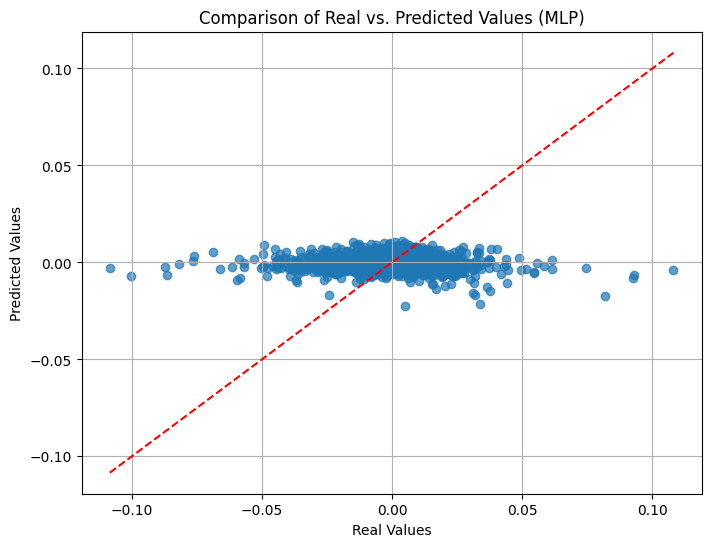

In [47]:
# Plot the results

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_test_pred_mlp, alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')             
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real vs. Predicted Values (MLP)')
plt.grid(True)
plt.show()

# **Final Results and Decisions**